# Enhancing the Efficiency of Deep Learning for Real-Time Stock Price Prediction: An Integration of Hadoop and Apache Spark

**Name:** 
Stephen Hasson

**Student No:** 
sba23014

**Student Email:**
sba23014@student.cct.ie

**Course:** 
CCT MSC in Data Analytics

**Assignment:**
MSC_DA_S2_CA1

**Year:**
Sept-23 Intake

## Table of Contents

### [Time-Series Forecasting](#time-series-forecasting)
### [Data Understanding Phase & Data Preparation Phase](#data_understanding_phase)
### [Modelling & Evaluation Phase](#modelling_phase)
***

<a id='time-series-forecasting'></a>
###  Time Series Forecasting
***
*"Time series forecasting is the process of analyzing time series data using statistics and modeling to make predictions and inform strategic decision-making"* (2023, Tableau)

Below Image Credit (2023, Nguyen)

In [1]:
# Suppress warning messages
import warnings
warnings.filterwarnings('ignore')

# Suppress deprecation warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category = DeprecationWarning)

# Import necessary libraries
from IPython.display import display, HTML

# Image URL
image_url = "https://github.com/sba23014/cct_msc_data_analytics/raw/main/s2_ca1/rnn_example_picture.png"

# Display the image
display(HTML(f'<center><img src = "{image_url}" width = 600 height = 300 /></center>'))

In [2]:
# Import EDA & visualisation packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import feature scaling packages
from sklearn.preprocessing import MinMaxScaler

# Import Neural Network modeling packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

# Display all columns of the pandas df
pd.set_option('display.max_columns', None)

# Configure default colour scheme for seaborn
sns.set(color_codes = True)

# Apply the Seaborn Whitegrid style
plt.style.use('seaborn-whitegrid')

# Suppress warning messages
import warnings
warnings.filterwarnings('ignore')

##  Notebook Requirements

In [3]:
# Export requirements.txt file
# !pip freeze > requirements.txt

**Notes:**

For the purpose of enhanced readability, dependency clarity and easier debugging I have centralised all of the Python libraries and default settings used in this analysis at the beginning of my code. I will explain why specific libraries have been used as appropriate as they are utilised in the clode.

I have chosen to remove the default column restrictions with regards to the Pandas DataFrame (df) so that it will be easier to review all of the series in the one cell.

The option to suppress warning messages was applied as a default setting retrospectively once analysis was complete, the rationale for this decision is to help enhance readability by eliminating non-critical alerts and streamlining output display.

I used the below 4 core libraries as my primary libraries for data analysis & visualisation:

* **Pandas** - I used this library as it makes it really easy to load and manipulate structured data through the use of Pandas dataframes & it has a lot of great functions for data cleaning & transformation which allows me to get my data ready for deeper analysis and modelling. 
* **Numpy** - I used this library for it's numerical functions & for it's ability to prepare data in particular for Machine Learning modelling due to the different data structures required for those models such as arrays and matrices. 
* **Matplotlib** - I used this library when I need to plot more low level detailed data visualisation that Seaborn is too high level to provide. It gives me a great level of customisation though generally is more tedious & time consuming to produce effective visualisations than Seaborn. 
* **Seaborn** - I prefer to use Seaborn as it's an easier, more efficient & aesthetically pleasing method for plotting data visualisations when I don't require the deeper level of customisation or detail that some visualisations need.

**References**:
* https://pandas.pydata.org/
* https://numpy.org/
* https://matplotlib.org/
* https://seaborn.pydata.org/

<a id='data_understanding_phase'></a>
##  Data Understanding Phase & Data Preparation Phase

### Pre-Processed GSK Daily Stock Price Data from Hadoop / ApacheSpark

In [4]:
# Create variable to store the raw url of gsk stock price dataset uploaded to personal github account
df_url = 'https://raw.githubusercontent.com/sba23014/cct_msc_data_analytics/main/s2_ca1/pyspark_df.csv'

# Read file from github url into Pandas DataFrame (df)
df_all = pd.read_csv(df_url)

# Return first 5 rows to validate 'data' df creation
df_all.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Month,Day,DailyChange,PriceTrend
0,1980-03-28,0.000000,0.149641,0.139201,0.139201,2400,0.0,0.0,1980,3,28,0.139201,Up
1,1980-03-31,0.139201,0.139201,0.139201,0.139201,0,0.0,0.0,1980,3,31,0.000000,Down
2,1980-04-01,0.139201,0.139201,0.139201,0.139201,0,0.0,0.0,1980,4,1,0.000000,Down
3,1980-04-02,0.000000,0.149641,0.139201,0.139201,800,0.0,0.0,1980,4,2,0.139201,Up
4,1980-04-03,0.139201,0.139201,0.139201,0.139201,0,0.0,0.0,1980,4,3,0.000000,Down


In [5]:
# Generate df info
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11079 entries, 0 to 11078
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          11079 non-null  object 
 1   Open          11079 non-null  float64
 2   High          11079 non-null  float64
 3   Low           11079 non-null  float64
 4   Close         11079 non-null  float64
 5   Volume        11079 non-null  int64  
 6   Dividends     11079 non-null  float64
 7   Stock Splits  11079 non-null  float64
 8   Year          11079 non-null  int64  
 9   Month         11079 non-null  int64  
 10  Day           11079 non-null  int64  
 11  DailyChange   11079 non-null  float64
 12  PriceTrend    11079 non-null  object 
dtypes: float64(7), int64(4), object(2)
memory usage: 1.1+ MB


In [6]:
# Change 'Date' datatype from Ojbect to Datetime
df_all['Date'] = pd.to_datetime(df_all['Date'])

In [7]:
# Generate descriptive statistics
df_all.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Month,Day,DailyChange
count,11079.000000,11079.000000,11079.000000,11079.000000,1.107900e+04,11079.000000,11079.000000,11079.000000,11079.000000,11079.000000,11079.000000
mean,15.990020,16.187681,15.962644,16.077199,1.938349e+06,0.005215,0.000724,2001.686253,6.542016,15.734904,0.087180
std,11.896278,11.851240,11.717893,11.785982,1.832171e+06,0.052790,0.035723,12.692025,3.430903,8.750387,0.318798
min,0.000000,0.114841,0.114841,0.114841,0.000000e+00,0.000000,0.000000,1980.000000,1.000000,1.000000,-1.957562
25%,4.326063,4.374434,4.292525,4.341544,7.470500e+05,0.000000,0.000000,1991.000000,4.000000,8.000000,-0.055856
50%,17.354406,17.525377,17.200454,17.381336,1.450200e+06,0.000000,0.000000,2002.000000,7.000000,16.000000,0.018224
75%,25.686454,25.868550,25.558481,25.713539,2.581550e+06,0.000000,0.000000,2013.000000,10.000000,23.000000,0.158265
max,43.680000,43.840000,43.480000,43.580002,3.538990e+07,1.252000,2.000000,2024.000000,12.000000,31.000000,3.027242


In [8]:
# Total number of rows and columns
print('data:')
print(df_all.shape)
print()

# Rows containing duplicate data
data_dup_rows = df_all[df_all.duplicated()]
print('Number of duplicate rows:')
print(data_dup_rows.shape)
print()

# Used to count the number of rows before removing the data
print('Row count before removing duplicates:')
print()
print(df_all.count())
print()

# Dropping the duplicates
df_all = df_all.drop_duplicates()

# Counting the number of rows after removing duplicates.
print('Row count after removing duplicates:')
print()
print(df_all.count())
print()

data:
(11079, 13)

Number of duplicate rows:
(0, 13)

Row count before removing duplicates:

Date            11079
Open            11079
High            11079
Low             11079
Close           11079
Volume          11079
Dividends       11079
Stock Splits    11079
Year            11079
Month           11079
Day             11079
DailyChange     11079
PriceTrend      11079
dtype: int64

Row count after removing duplicates:

Date            11079
Open            11079
High            11079
Low             11079
Close           11079
Volume          11079
Dividends       11079
Stock Splits    11079
Year            11079
Month           11079
Day             11079
DailyChange     11079
PriceTrend      11079
dtype: int64



**Notes:**

* The above Exploratory Data Analysis (EDA) were completed in order to prepare my dataset for further analysis & visualisation.
* I opted to save my datasets in my GitHub so that any user can go in and view the raw data files and re-run this analysis on their own machine. I could've saved them on my personal drive however I want the user to have full visibility of my analysis.
* There are no missing values in my df so no filling of missing values is required.
* It contains a substantial number of rows: '11,079' which will help ensure my Reurrent Neural Network has a sizeable amount of records data to analyse/model, which should in theory help improve accuracy vs. a smaller dataset
* The earliest recorded value in the time-series is from 1980, with the most recent in 2024.
* The closing stock price has moved considerably during this time period, from '0.114841' at it's min to '43.580002' at it's peak.

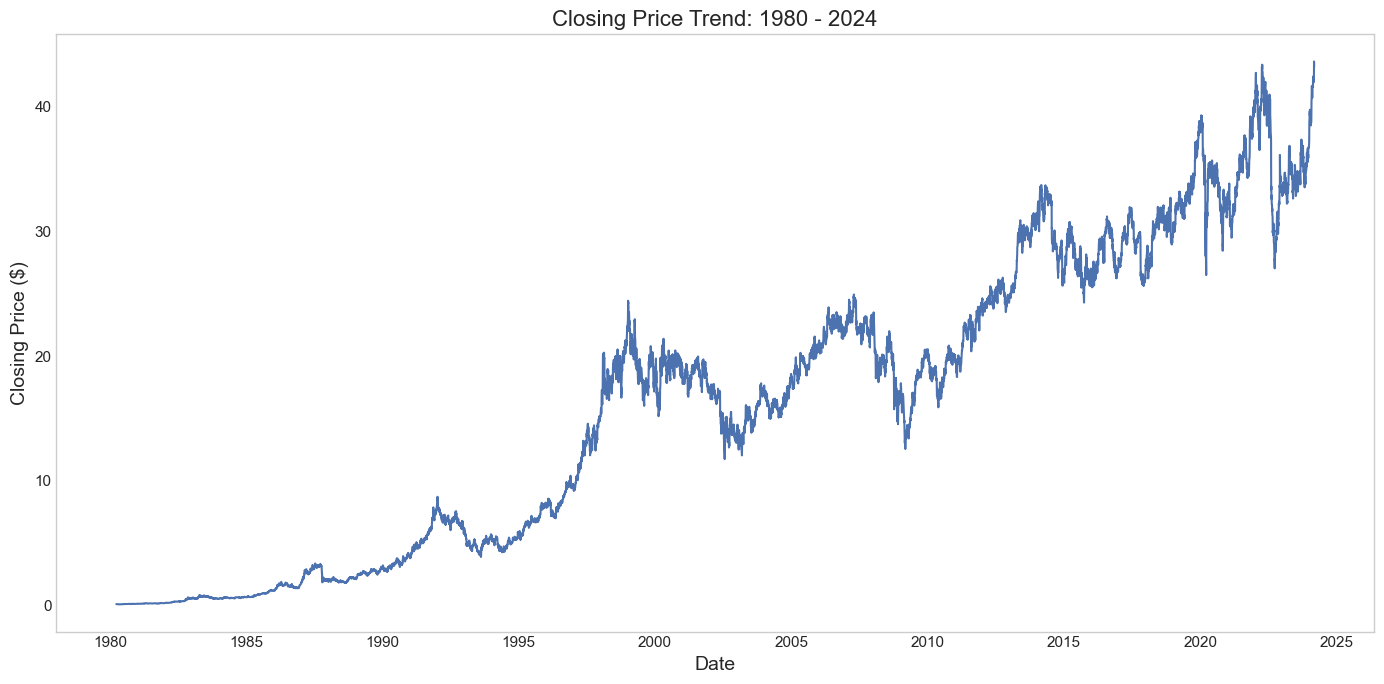

In [9]:
# Convert 'Date' to datetime format for plotting
df_all['Date'] = pd.to_datetime(df_all['Date'])

# Plot 'Close' price over time
plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Close', data = df_all, color  ='b')
plt.title('Closing Price Trend: 1980 - 2024', size = 16)
plt.xlabel('Date', size = 14)
plt.ylabel('Closing Price ($)', size = 14)
plt.grid(False)
plt.tight_layout()
plt.show()

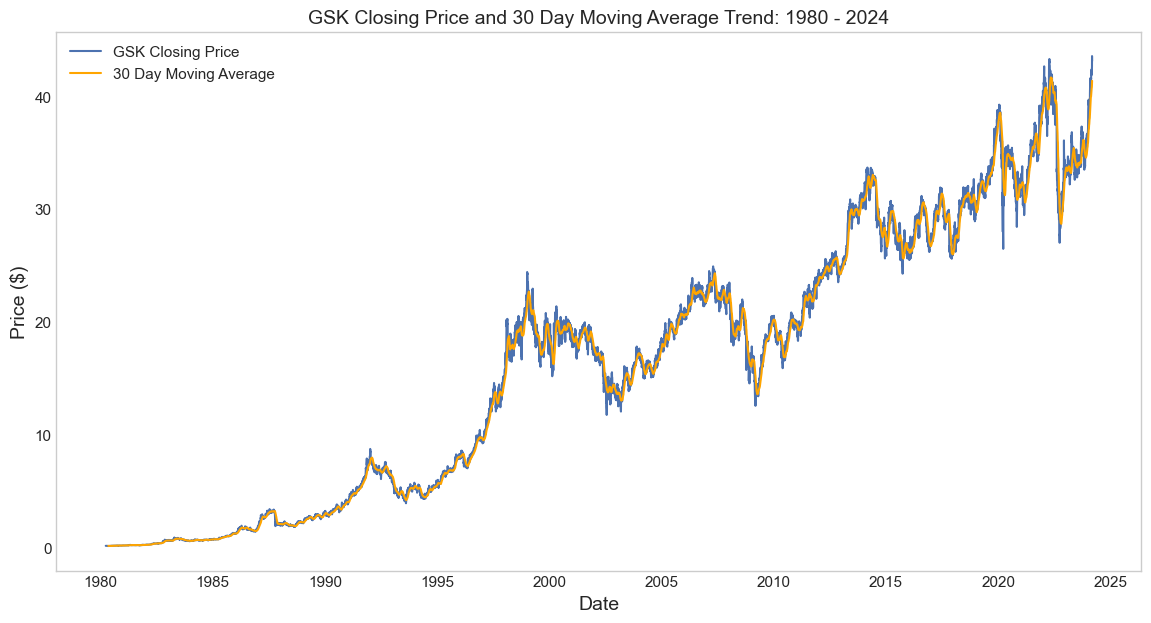

In [10]:
# Calculate and plot a 30-day moving average of the close price
df_all['30 Day MA'] = df_all['Close'].rolling(window = 30).mean()

# Plot both the 'Close' & '30 Day MA'
plt.figure(figsize=(14, 7))
plt.plot(df_all['Date'], df_all['Close'], label='GSK Closing Price')
plt.plot(df_all['Date'], df_all['30 Day MA'], label='30 Day Moving Average', color='orange')
plt.title('GSK Closing Price and 30 Day Moving Average Trend: 1980 - 2024', size = 14)
plt.xlabel('Date', size = 14)
plt.ylabel('Price ($)', size = 14)
plt.legend()
plt.grid(False)
plt.show()

**Notes:**

* The Closing price 30 Day Moving Average have generally maintained an upward trajectory based with some sizeable downward periods, particulary duing the great financial crisis of 2007-2008 and during the recent pandemic of 2019-2022.
* Line graphs are very effective for showing trends over time, and following Tufte's principles (Tufte, 2001) 'non-data ink' has been erased by removing gridlines as the purpose here is to show the trend. 
* The colours blue and orange were chosen for their distinctness as well as the inclusion of a legend for ease of understanding of what each of the lines represents.

**References:**
* https://seaborn.pydata.org/generated/seaborn.lineplot.html
***

### Pre-Processed GSK Aggregated Stock Price Data

In [11]:
# Create variable to store the raw url of grouped gsk stock price dataset uploaded to personal github account
df_grouped_url = 'https://raw.githubusercontent.com/sba23014/cct_msc_data_analytics/main/s2_ca1/pyspark_df_grouped.csv'

# Read file from github url into Pandas DataFrame (df)
df_grouped = pd.read_csv(df_grouped_url)

# Return first 5 rows to validate 'data' df creation
df_grouped.head()

,Year,Month,TotalVolume,MaxHigh,MinLow,AvgClose
0,1990,7,35596600,3.86,3.48,3.68
1,1997,11,8155100,14.67,12.73,13.77
2,2022,10,125076700,31.56,28.06,29.47
3,1980,8,42400,0.16,0.14,0.15
4,1987,10,65422000,3.25,1.76,2.56


In [12]:
# Generate df info
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         529 non-null    int64  
 1   Month        529 non-null    int64  
 2   TotalVolume  529 non-null    int64  
 3   MaxHigh      529 non-null    float64
 4   MinLow       529 non-null    float64
 5   AvgClose     529 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 24.9 KB


In [13]:
# Generate descriptive statistics
df_grouped.describe()

,Year,Month,TotalVolume,MaxHigh,MinLow,AvgClose
count,529.000000,529.000000,5.290000e+02,529.000000,529.000000,529.000000
mean,2001.708885,6.493384,4.059540e+07,16.828828,15.361758,16.112987
std,12.740948,3.455405,2.984867e+07,12.276267,11.363538,11.829311
min,1980.000000,1.000000,2.400000e+03,0.130000,0.110000,0.120000
25%,1991.000000,3.000000,1.840280e+07,4.740000,4.050000,4.330000
50%,2002.000000,6.000000,3.390780e+07,18.400000,16.370000,17.340000
75%,2013.000000,9.000000,5.608960e+07,26.480000,24.890000,25.630000
max,2024.000000,12.000000,1.868247e+08,43.840000,41.780000,42.730000


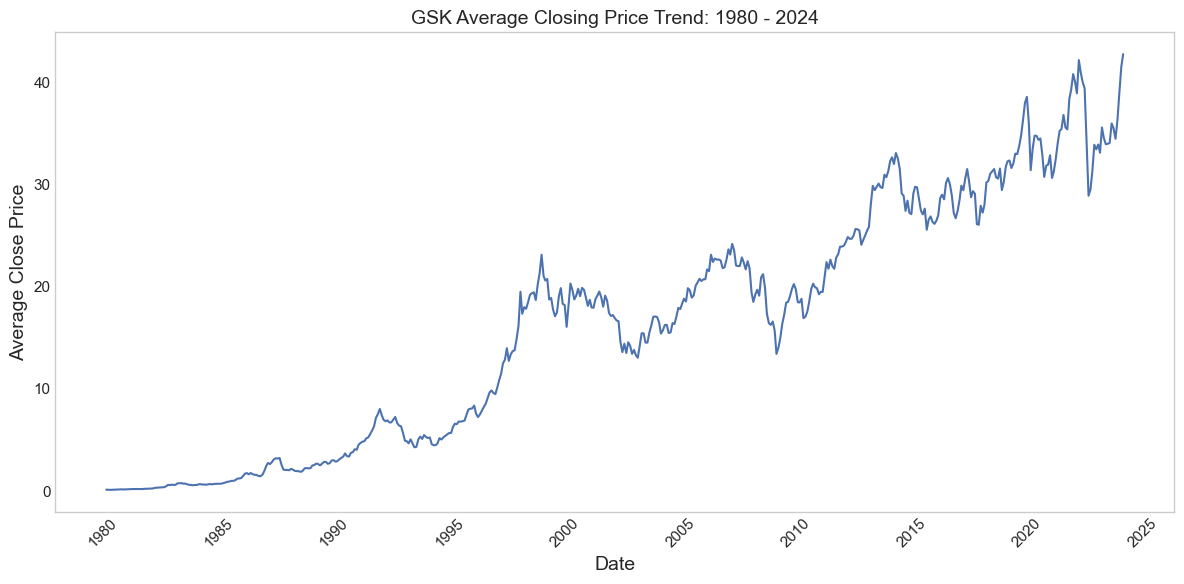

In [14]:
# Create a datetime column for plotting
df_grouped['Date'] = pd.to_datetime(df_grouped[['Year', 'Month']].assign(DAY = 1))

# Line plot for AvgClose over time
plt.figure(figsize = (12, 6))
sns.lineplot(x = 'Date', y = 'AvgClose', data = df_grouped, linestyle = '-', color='b')
plt.title('GSK Average Closing Price Trend: 1980 - 2024', size = 14)
plt.xlabel('Date', size = 14)
plt.ylabel('Average Close Price', size = 14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(False)
plt.show()

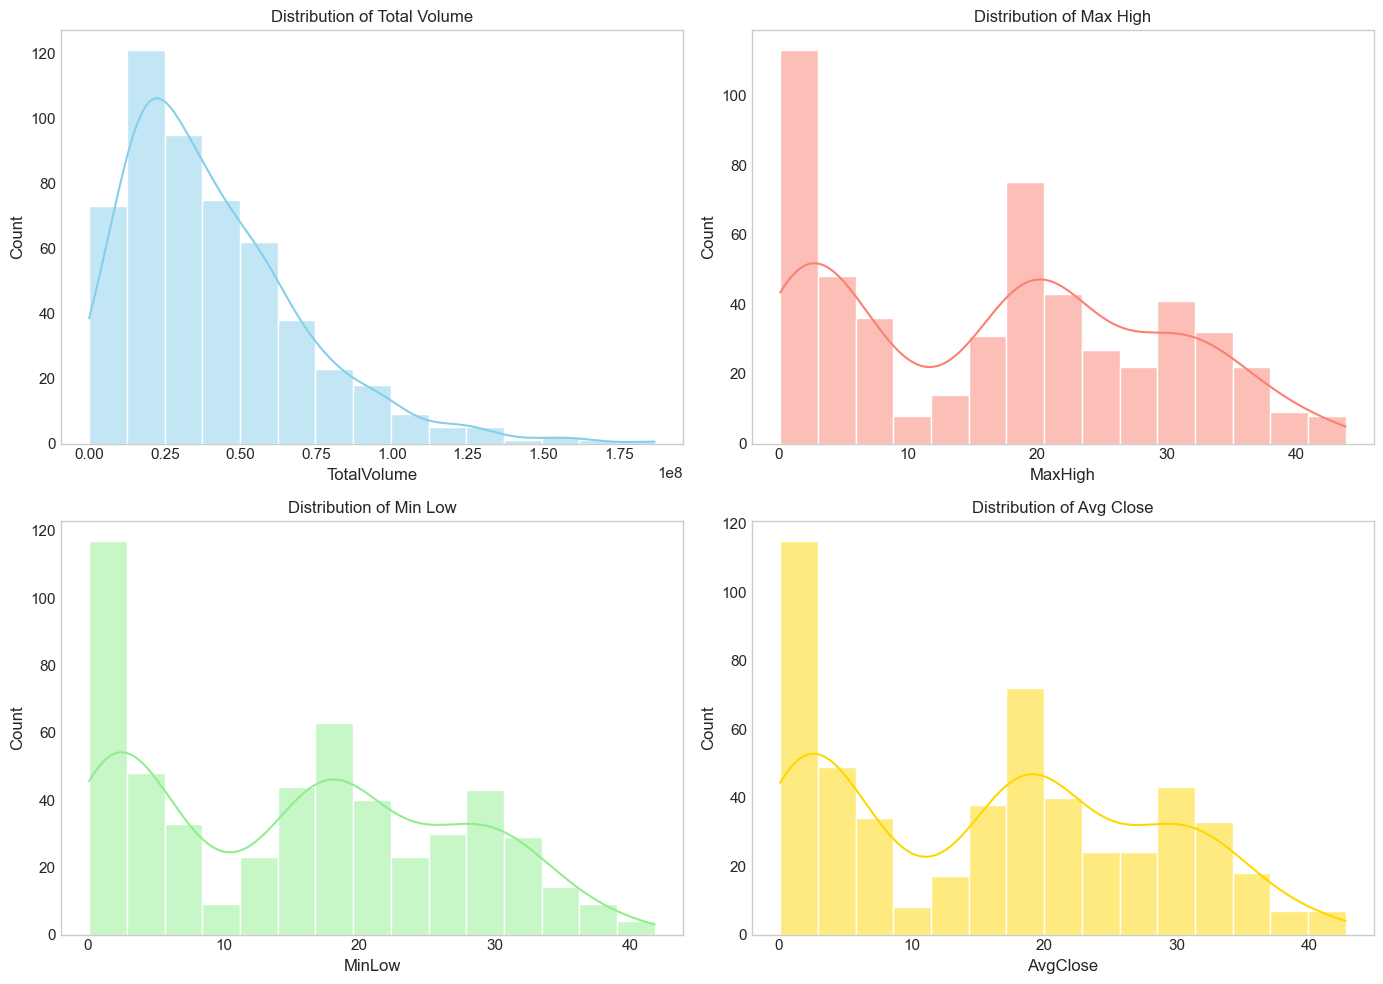

In [15]:
# Create Histograms for TotalVolume, MaxHigh, MinLow, and AvgClose
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Total Volume
sns.histplot(df_grouped['TotalVolume'], bins=15, kde=True, ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title('Distribution of Total Volume')
axs[0, 0].grid(False)

# Max High
sns.histplot(df_grouped['MaxHigh'], bins=15, kde=True, ax=axs[0, 1], color='salmon')
axs[0, 1].set_title('Distribution of Max High')
axs[0, 1].grid(False)

# Min Low
sns.histplot(df_grouped['MinLow'], bins=15, kde=True, ax=axs[1, 0], color='lightgreen')
axs[1, 0].set_title('Distribution of Min Low')
axs[1, 0].grid(False)

# Avg Close
sns.histplot(df_grouped['AvgClose'], bins=15, kde=True, ax=axs[1, 1], color='gold')
axs[1, 1].set_title('Distribution of Avg Close')
axs[1, 1].grid(False)

plt.tight_layout()
plt.grid(False)
plt.show()

**Notes:**

* Histograms provide a ‘discretized display of value frequency’ (McKinney 2018). When used to plot the columns in my aggregated df it demonstrates the different distributions of each series.
* In addition to gridlines being removed to ‘erase non-data ink’ per Tufte’s principles (Tufte 2001) the number of bins was selected as ‘15’ as the lowest number I felt which communicated the information in this visualisation.
* Seperate colour palettes were chosen to differentiate each histogram for cliarty.
* 'MaxHigh', 'MinLow' & 'AvgClose' all follow a non-normal disribution with no discernable skew, perhaps a slight right / positive skew.
* The 'TotalVolume' series is strongly right/positively skewed indicating that most of the values are conventrated on the left side of the distribution & that there are a few unusually high values, potentially outliers which stretch the tail to the right.  

**References:**
* https://seaborn.pydata.org/generated/seaborn.histplot.html

<a id='modelling_phase'></a>
##  Modelling & Evaluation Phase

In [16]:
# Create variable to store the raw url of stock price training dataset uploaded to personal github account
train_data_url = 'https://raw.githubusercontent.com/sba23014/cct_msc_data_analytics/main/s2_ca1/pyspark_df_train.csv'

# Read file from github url into Pandas DataFrame (df)
training_data = pd.read_csv(train_data_url)

# Return first 5 rows to validate 'data' df creation
training_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Month,Day,DailyChange,PriceTrend
0,28/03/1980,0.000000,0.149641,0.139201,0.139201,2400,0.0,0.0,1980,3,28,0.139201,Up
1,31/03/1980,0.139201,0.139201,0.139201,0.139201,0,0.0,0.0,1980,3,31,0.000000,Down
2,01/04/1980,0.139201,0.139201,0.139201,0.139201,0,0.0,0.0,1980,4,1,0.000000,Down
3,02/04/1980,0.000000,0.149641,0.139201,0.139201,800,0.0,0.0,1980,4,2,0.139201,Up
4,03/04/1980,0.139201,0.139201,0.139201,0.139201,0,0.0,0.0,1980,4,3,0.000000,Down


In [17]:
# Create variable to store the raw url of stock price testing dataset uploaded to personal github account
test_data_url = 'https://raw.githubusercontent.com/sba23014/cct_msc_data_analytics/main/s2_ca1/pyspark_df_test.csv'

# Read file from github url into Pandas DataFrame (df)
testing_data = pd.read_csv(test_data_url)

# Return first 5 rows to validate 'data' df creation
testing_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Month,Day,DailyChange,PriceTrend
0,09/02/2024,41.553807,41.652841,41.365647,41.504292,3503400,0.0,0,2024,2,9,-0.049515,Down
1,12/02/2024,41.009129,41.009129,40.484261,40.672421,6688800,0.0,0,2024,2,12,-0.336709,Down
2,13/02/2024,41.167580,41.197289,40.682326,40.989323,7056800,0.0,0,2024,2,13,-0.178258,Down
3,14/02/2024,41.355742,41.524098,41.187389,41.395355,7442600,0.0,0,2024,2,14,0.039614,Up
4,15/02/2024,41.375548,41.613226,41.276517,41.365646,4145000,0.0,0,2024,2,15,-0.009902,Down


In [18]:
# Validate length of training & testing df splits
print(f"Training Data Size: {len(training_data)}")
print(f"Testing Data Size: {len(testing_data)}")

Training Data Size: 11059
Testing Data Size: 20


In [19]:
# Review last 5 lines of training data
training_data.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Month,Day,DailyChange,PriceTrend
11054,02/02/2024,40.216874,40.454548,40.018809,40.325809,3925000,0.0,0.0,2024,2,2,0.108936,Up
11055,05/02/2024,41.365644,41.484482,41.009129,41.167580,7985100,0.0,0.0,2024,2,5,-0.198065,Down
11056,06/02/2024,41.286420,41.365647,40.900196,41.345840,3671600,0.0,0.0,2024,2,6,0.059421,Up
11057,07/02/2024,41.524095,41.801383,41.494387,41.613224,6042800,0.0,0.0,2024,2,7,0.089129,Up
11058,08/02/2024,41.415161,41.484483,41.048744,41.415161,4303300,0.0,0.0,2024,2,8,0.000000,Down


In [20]:
# Review last 5 lines of training data
testing_data.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Month,Day,DailyChange,PriceTrend
15,04/03/2024,42.040001,42.439999,42.020000,42.439999,2404300,0.0,0,2024,3,4,0.399998,Up
16,05/03/2024,42.630001,42.779999,42.490002,42.599998,2635200,0.0,0,2024,3,5,-0.030003,Down
17,06/03/2024,42.380001,42.709999,42.330002,42.619999,3247400,0.0,0,2024,3,6,0.239998,Up
18,07/03/2024,43.680000,43.840000,43.480000,43.580002,4382300,0.0,0,2024,3,7,-0.099998,Down
19,08/03/2024,43.020000,43.220001,42.910000,43.139999,3308100,0.0,0,2024,3,8,0.119999,Up


**Notes:**

* For the purpose of training this Recurrent Neural Network (RNN) I decided to use a training set of data from 1980 to 2024 excluding the last 20 records of that dataset which I've retained for testing.
* The 'Close' price was chosen as my variable for prediction as it's generally the most suitable in the context of stock price prediction
* For the actual modeling of my RNN I will primiarily using 'Tensorflow Keras' functionality for the following reasons:
    * **Sequential**: This linear stack of layers allows me to create a RNN model layer-by-layer over time.
    * **Dense**: This fully connected dense layer will be used as the output layer of the RNN, meaning that each input node is connected with each output node.
    * **LSTM**: The Long Short-Term Memory (LSTM) layers will be used due to their suitability for sequence prediction problems as they are able to remember past information that can be used to influence current output
    * **Dropout**: Is a regularisation technique that I'll use to avoid overfitting during training the RNN which involves randomly excluding certain layers during the training stage.

**References:**
* https://www.tensorflow.org/guide/keras
***

* Like Machine Learning models RNN's require data in the correct formats which is why several reshaping functions are executed in the below steps.
* Additionally feature scaling of my data is required to ensure that imbalances in the dataset do not have an undue influence on the model's learning process, thereby improving training stability & convergence efficiency.
* For this purpose 'MinMaxScaler' from 'SciKit-Learn' was chosen to normalise the dataset features to a specified range between 0 & 1, which ensures that all input features contribute equally to the model's training process.

**References:**
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [21]:
# Storing the 'Close' training values in a NumPy array 
training_data = training_data.iloc[:, 4].values

# Validating results & array structure
training_data

array([ 0.1392013 ,  0.1392013 ,  0.1392013 , ..., 41.34584045,
       41.61322403, 41.41516113])

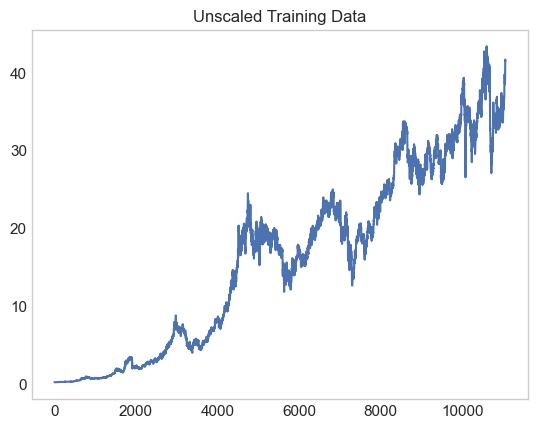

In [22]:
# Plotting the Unscaled Training Data
plt.plot(training_data)
plt.title("Unscaled Training Data")
plt.grid(False)
plt.show()

In [23]:
# Defining the scaler to be used
scaler = MinMaxScaler()

In [24]:
# Scaling the training data
training_data = scaler.fit_transform(training_data.reshape(-1, 1))

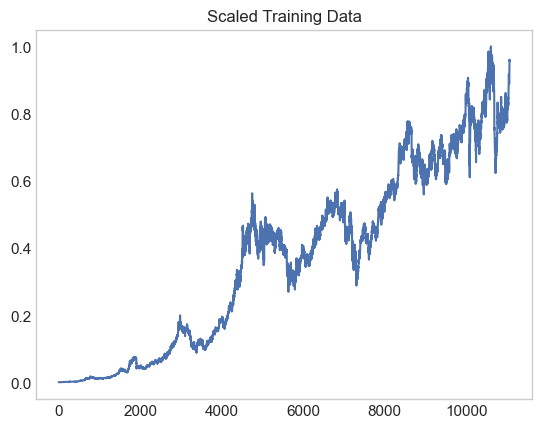

In [25]:
# Plotting the Scaled Training Data
plt.plot(training_data)
plt.title("Scaled Training Data")
plt.grid(False)
plt.show()

**Notes:**

* 40 timesteps have been chosen as the number of timesteps to train my RNN, this means that for every day that the neural network predicts, it will consider the previous 40 days of stock prices to determine its output, I chose this amount as I feel like it is a reasonable amount of values to use for training, anymore & the results could begin to be influenced too heavily.
* My 'x_training_data' variable will store the previous 40 stock price observations in the dataset which is what the RNN will use to make predictions.
* My 'y_training_data' will contain the stock price fo the next trading day, this is the value that the RNN is trying to predict.

In [26]:
# Create empty lists to stock price values
x_training_data = []
y_training_data =[]

In [27]:
# Create for loop to populate the data in each list
for i in range(40, len(training_data)):
    x_training_data.append(training_data[i-40:i, 0])
    y_training_data.append(training_data[i, 0])

In [28]:
# Convert the lists into arrays
x_training_data = np.array(x_training_data)
y_training_data = np.array(y_training_data)

In [29]:
# Validate shape 
print(x_training_data.shape)
print(y_training_data.shape)

(11019, 40)
(11019,)


In [30]:
# Reshape for RNN specific format
x_training_data = np.reshape(x_training_data, (x_training_data.shape[0], 
                                               x_training_data.shape[1], 
                                               1))

In [31]:
# Validate shape
print(x_training_data.shape)

(11019, 40, 1)


**Notes:**

* To build my RNN model the following model configuration decisions were made for these reasons:
    * **rnn = Seqential:** This is to ensure my model is built through adding sequences of layers over time.
    * **units = 45:** I chose 45 as the number of neurons included in my LSTM layer as a balance between the model complexity & computational efficiency. This model is moderately complex so 45 could be seen as a sufficient number.
    * **dropout = 0.2:** By randomly setting my Dropout at 20% I'm hoping that this will help to prevent overfitting. 20% is typically seen as a standard Dropout value to use for this type of model.
    * **optimizer = 'adam':** Adam was chosen due to its adaptive learning rate properties which make it effective & efficient is a large range of problems, including those with larger datasets & parameters. 
    * **loss = 'mean_squared_error':** The Mean Squared Error (MSE) was chosen for it's simplicity & effectiveness as the goal of this model is to minimise the difference between the predicted values & the actual values. 
    * **Dense(units = 1):** Here I define my output layer as being 1 as I want to predict the next days stock price.
    * **epochs = 100:** Setting the epochs at 100 allows the model sufficient iterations to learn from the training data. I set it at 100 to provide a balance between giving the model enough time to converge on a good solution & preventing overfitting by not training for too long.
    * **batch_size = 32:** This is typically seen as a common chose for RNN models which means that the model updates its weights after every 32 samples which I chose as it provides a good compromise between computation speed and accuracy.

In [32]:
# Initialise sequential model for building RNN
rnn = Sequential()

In [33]:
# Add LSTM layer, return sequences & define input shape based on training data
rnn.add(LSTM(units = 45, return_sequences = True, input_shape = (x_training_data.shape[1], 1)))

In [34]:
# Specify 'Dropout' rate of 20%
rnn.add(Dropout(0.2))

In [35]:
# Add second LSTM layer
rnn.add(LSTM(units = 45, return_sequences = True))

# Add dropout layer
rnn.add(Dropout(0.2))

# Add third LSTM layer
rnn.add(LSTM(units = 45, return_sequences = True))

# Add another dropout layer
rnn.add(Dropout(0.2))

# Add fourth LSTM layer
rnn.add(LSTM(units = 45))

# Add final dropout layer
rnn.add(Dropout(0.2))

In [36]:
# Add dense output layer, this 
rnn.add(Dense(units = 1))

In [37]:
# Compile RNN model with 'Adam' optimiser & 'MSE' as the loss function
rnn.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [38]:
# Train the RNN model on training data for 100 epochs & batch size of 32
rnn.fit(x_training_data, y_training_data, epochs = 100, batch_size = 32)

Epoch 1/100
345/345 [==============================] - 20s 42ms/step - loss: 0.0055
Epoch 2/100
345/345 [==============================] - 14s 40ms/step - loss: 0.0020
Epoch 3/100
345/345 [==============================] - 17s 48ms/step - loss: 0.0017
Epoch 4/100
345/345 [==============================] - 14s 41ms/step - loss: 0.0015
Epoch 5/100
345/345 [==============================] - 14s 40ms/step - loss: 0.0014
Epoch 6/100
345/345 [==============================] - 15s 42ms/step - loss: 0.0013
Epoch 7/100
345/345 [==============================] - 15s 43ms/step - loss: 0.0012
Epoch 8/100
345/345 [==============================] - 15s 43ms/step - loss: 0.0011
Epoch 9/100
345/345 [==============================] - 15s 43ms/step - loss: 0.0011
Epoch 10/100
345/345 [==============================] - 15s 43ms/step - loss: 0.0010
Epoch 11/100
345/345 [==============================] - 15s 43ms/step - loss: 0.0010
Epoch 12/100
345/345 [==============================] - 15s 45ms/step - lo

345/345 [==============================] - 13s 38ms/step - loss: 5.7232e-04
Epoch 94/100
345/345 [==============================] - 13s 38ms/step - loss: 5.5696e-04
Epoch 95/100
345/345 [==============================] - 13s 38ms/step - loss: 5.6886e-04
Epoch 96/100
345/345 [==============================] - 14s 40ms/step - loss: 5.6918e-04
Epoch 97/100
345/345 [==============================] - 15s 42ms/step - loss: 5.7440e-04
Epoch 98/100
345/345 [==============================] - 13s 39ms/step - loss: 5.5478e-04
Epoch 99/100
345/345 [==============================] - 13s 38ms/step - loss: 5.5914e-04
Epoch 100/100
345/345 [==============================] - 14s 40ms/step - loss: 5.7835e-04


**Notes:**

* Now that my model is built the below steps were taking to ensure my testing data is in the correct format to allow me to use it for calculating predictions.
* As my testing dataset contains only 20 oberservations I reimported my unscaled training & testing data to create my new testing dataset which contains the 20 observations for prediction & the 40 previous trading days. Some of these trading days will come from the test set whilst some will come from the training set.
* Once re-shaped similar scaling steps were take on the testing dataset based on the reasons previously provided.

In [39]:
# Storing the 'Close' testing values in a NumPy array 
testing_data = testing_data.iloc[:, 4].values

# Validating results & array structure
testing_data

array([41.50429153, 40.6724205 , 40.98932266, 41.39535522, 41.36564636,
       41.53399658, 41.61322403, 41.53399658, 42.15999985, 42.22000122,
       42.34000015, 42.38000107, 42.34000015, 41.90000153, 42.02999878,
       42.43999863, 42.59999847, 42.61999893, 43.58000183, 43.13999939])

In [40]:
# Validate shape
print(testing_data.shape)

(20,)


In [41]:
# Create variable to store the raw url of stock price training dataset uploaded to personal github account
train_data_url = 'https://raw.githubusercontent.com/sba23014/cct_msc_data_analytics/main/s2_ca1/pyspark_df_train.csv'

# Read file from github url into Pandas DataFrame (df)
unscaled_training_data = pd.read_csv(train_data_url)

# Return first 5 rows to validate 'data' df creation
unscaled_training_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Month,Day,DailyChange,PriceTrend
0,28/03/1980,0.000000,0.149641,0.139201,0.139201,2400,0.0,0.0,1980,3,28,0.139201,Up
1,31/03/1980,0.139201,0.139201,0.139201,0.139201,0,0.0,0.0,1980,3,31,0.000000,Down
2,01/04/1980,0.139201,0.139201,0.139201,0.139201,0,0.0,0.0,1980,4,1,0.000000,Down
3,02/04/1980,0.000000,0.149641,0.139201,0.139201,800,0.0,0.0,1980,4,2,0.139201,Up
4,03/04/1980,0.139201,0.139201,0.139201,0.139201,0,0.0,0.0,1980,4,3,0.000000,Down


In [42]:
# Create variable to store the raw url of stock price testing dataset uploaded to personal github account
test_data_url = 'https://raw.githubusercontent.com/sba23014/cct_msc_data_analytics/main/s2_ca1/pyspark_df_test.csv'

# Read file from github url into Pandas DataFrame (df)
unscaled_testing_data = pd.read_csv(test_data_url)

# Return first 5 rows to validate 'data' df creation
unscaled_testing_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Month,Day,DailyChange,PriceTrend
0,09/02/2024,41.553807,41.652841,41.365647,41.504292,3503400,0.0,0,2024,2,9,-0.049515,Down
1,12/02/2024,41.009129,41.009129,40.484261,40.672421,6688800,0.0,0,2024,2,12,-0.336709,Down
2,13/02/2024,41.167580,41.197289,40.682326,40.989323,7056800,0.0,0,2024,2,13,-0.178258,Down
3,14/02/2024,41.355742,41.524098,41.187389,41.395355,7442600,0.0,0,2024,2,14,0.039614,Up
4,15/02/2024,41.375548,41.613226,41.276517,41.365646,4145000,0.0,0,2024,2,15,-0.009902,Down


In [43]:
# Concatentate both unscaled training & testing datasets
all_data = pd.concat((unscaled_training_data['Close'], unscaled_testing_data['Close']), axis = 0)

In [44]:
# Create the new testing dataset which contains 20 prediction values & previous 40 trading days
x_test_data = all_data[len(all_data) - len(testing_data) - 40:].values

In [45]:
# Validate length
len(x_test_data)

60

In [46]:
# Reshape for modeling
x_test_data = np.reshape(x_test_data, (-1, 1))

In [47]:
# Scale testing data 
x_test_data = scaler.transform(x_test_data)

**Notes:**

* Last step is grouping test data into 20 arrays each of size 40, which corresponds to a prediction for each of the dates in my original test dataset & contains the previous 40 trading days 

In [48]:
# Create an empty list for processed test data
final_x_test_data = []

# For each index from 40 to end of test data, append the previous 40 data points to final_x_test_data
for i in range(40, len(x_test_data)):

    final_x_test_data.append(x_test_data[i-40:i, 0])
# Convert to a NumPy array for model input
final_x_test_data = np.array(final_x_test_data)

In [49]:
# Reshape final_x_test_data to a 3D array for LSTM input
final_x_test_data = np.reshape(final_x_test_data, (final_x_test_data.shape[0], final_x_test_data.shape[1],1))

In [50]:
# Generate predictions for the processed test data using the trained RNN model
predictions = rnn.predict(final_x_test_data)

1/1 [==============================] - 1s 1s/step


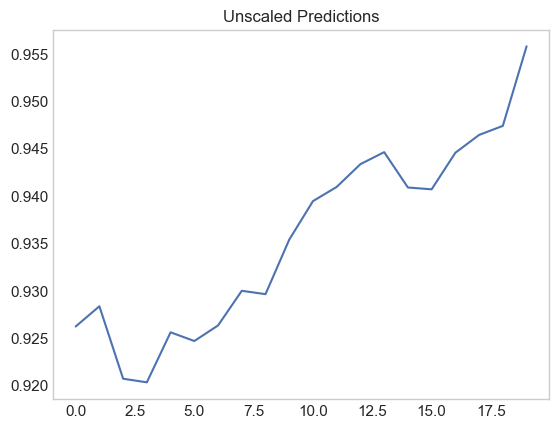

In [51]:
# Plot unscaled predictions
plt.plot(predictions) 
plt.title("Unscaled Predictions")
plt.grid(False)
plt.show()

In [52]:
# Un-scale data
unscaled_predictions = scaler.inverse_transform(predictions)

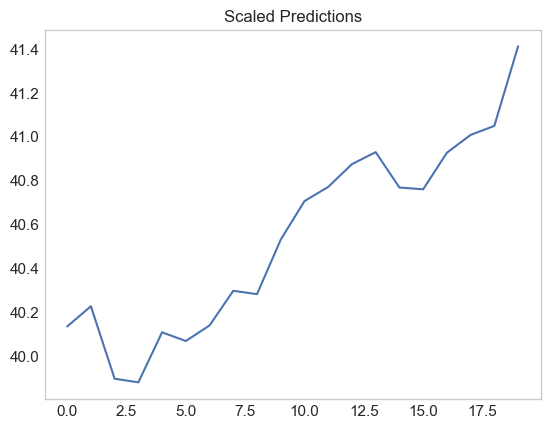

In [53]:
# Plot unscaled predictions
plt.plot(unscaled_predictions)
plt.title("Scaled Predictions")
plt.grid(False)
plt.show()

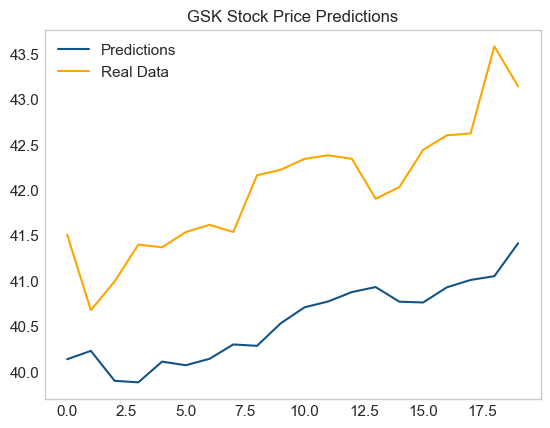

In [54]:
# Plot unscaled predictions against real data
plt.plot(unscaled_predictions, color = '#135485', label = "Predictions")
plt.plot(testing_data, color = 'orange', label = "Real Data")
plt.title('GSK Stock Price Predictions')
plt.legend()
plt.grid(False)
plt.show()

In [55]:
# Print comparison of first trading day prediction vs real data
print("The first trading day price predictionis: ", unscaled_predictions[0])
print("The real first trading day price is: ", testing_data[0])

The first trading day price predictionis:  [40.132084]
The real first trading day price is:  41.50429153


In [57]:
# Print comparison of last trading day prediction vs real data
print("The last trading day price prediction: ", unscaled_predictions[19])
print("The real last trading day price: ",testing_data[19])

The last trading day price prediction:  [41.409733]
The real last trading day price:  43.13999939
